In [1]:
import xarray as xr
import numpy as np
ecco_grid = xr.open_zarr('~/ECCO_transport')
xc = np.array(ecco_grid.XC)
yc = np.array(ecco_grid.YC)

In [2]:
xg = np.load('plotting_xg.npy')
yg = np.load('plotting_yg.npy')

In [3]:
from plot_config import *

In [4]:
# import os
# os.listdir(particle_path)

In [5]:
particle_path = '/sciserver/filedb08-01/ocean/wenrui_temp/particle_file/saltyM/'
# particle_path = '/sciserver/filedb11-01/ocean/wenrui_temp/particle_file/holliday/'
table_path = particle_path+'table/'
map_path = particle_path+'maps/'
maps = xr.open_zarr(map_path)
table= xr.open_zarr(table_path)

In [6]:
import os 
for i in range(1,9):
    os.listdir(f'/sciserver/filedb0{i}-02/')
big_ecco = xr.open_mfdataset('/sciserver/filedb0*-02/ocean/poseidon/daily_mean_ecco/zarr/mean*', engine = 'zarr')
ds = ecco_grid

In [7]:
time = '2007-01'

In [8]:
smean = xr.open_zarr('~/centerS_mean.zarr')

In [9]:
xrange = (-35,-0)
yrange = (47,65)
zrange = (-200,0)

lon_bool = np.logical_and(ds.XC[2]>xrange[0],ds.XC[2]<xrange[1])
lat_bool = np.logical_and(ds.YC[2]>yrange[0],ds.YC[2]<yrange[1])
dep_bool = np.logical_and(ds.Z>zrange[0],ds.Z<zrange[1])
pos_bool = np.logical_and(np.logical_and(lon_bool,lat_bool),dep_bool)

sp = big_ecco.SALT.sel(time = time)[0] - smean.smean
those = np.logical_and(sp[:,2]>0.1,pos_bool)
iz, iy, ix = (xr.DataArray(i,dims = 'stupid') for i in np.where(those))

TOTAL_VOLUME = float((those*ecco_grid.drF*ecco_grid.rA[2]).sum().values)
NUMBER_OF_PARTICLE = len(table.space)
VOLUME_EACH = TOTAL_VOLUME/NUMBER_OF_PARTICLE

In [10]:
VOLUME_EACH

269324444.5680091

In [19]:
discontinue_face_7 = xg[7]<-130
xg[7][discontinue_face_7 ]+=360

In [31]:
vmax = 30
def plot2d(sp,vmax = vmax,title = False, hash_type = 'wholedepth'):
    plt.figure(figsize = (16,9))
    ax = plt.axes(projection = projection)
    extent = (-95, 15, -10, 90)
    ax.set_extent(extent)
    n = 20
    # aoi = mpath.Path(
    #     list(zip(np.linspace(extent[0],extent[1], n), np.full(n, extent[3]))) + \
    #     list(zip(np.full(n, extent[1]), np.linspace(extent[3], extent[2], n))) + \
    #     list(zip(np.linspace(extent[1], extent[0], n), np.full(n, extent[2]))) + \
    #     list(zip(np.full(n, extent[0]), np.linspace(extent[2], extent[3], n)))
    # )
    # ax.set_boundary(aoi, transform=ccrs.PlateCarree())
    if hash_type == 'wholedepth':
        # pass
        ct = maps['count'].sum(axis = 0)/2
    else:
        ct = maps['count'][0]/2
    condition = ~np.logical_and(0<ct, ct<5e3)
    zm = np.ma.masked_where(condition,ct)
    to_plot = sp*VOLUME_EACH/ecco_grid.rA
    for i in [1,2,6,7,10,11]:
        p2 = ax.pcolormesh(xg[i] ,yg[i] ,to_plot[i] ,vmax = vmax,vmin = -vmax,cmap = balance, transform = ccrs.PlateCarree())
    for i in [1,2,7,10,11]:
        plt.pcolor(xg[i],yg[i],zm[i], hatch='..', alpha=0.,transform = ccrs.PlateCarree(),zorder = 10)
    # p2 = ax.pcolormesh(xc[1] ,yc[1] ,to_plot[1] ,vmax = vmax,vmin = -vmax,cmap = balance, transform = ccrs.PlateCarree())
    # p6 = ax.pcolormesh(xc[6] ,yc[6] ,to_plot[6] ,vmax = vmax,vmin = -vmax,cmap = balance, transform = ccrs.PlateCarree())
    # p7 = ax.pcolormesh(xc[7] ,yc[7] ,to_plot[7] ,vmax = vmax,vmin = -vmax,cmap = balance, transform = ccrs.PlateCarree())
    # p10 =ax.pcolormesh(xc[10],yc[10],to_plot[10],vmax = vmax,vmin = -vmax,cmap = balance, transform = ccrs.PlateCarree())
    # p11 =ax.pcolormesh(xc[11],yc[11],to_plot[11],vmax = vmax,vmin = -vmax,cmap = balance, transform = ccrs.PlateCarree())
    ax.add_feature(cfeature.LAND, zorder=10, facecolor='grey')
    plt.colorbar(p2, label = r'$psu\cdot m$')
    
    if title:
        plt.title(title)
    # plt.show()

In [32]:
VOLUME_EACH

269324444.5680091

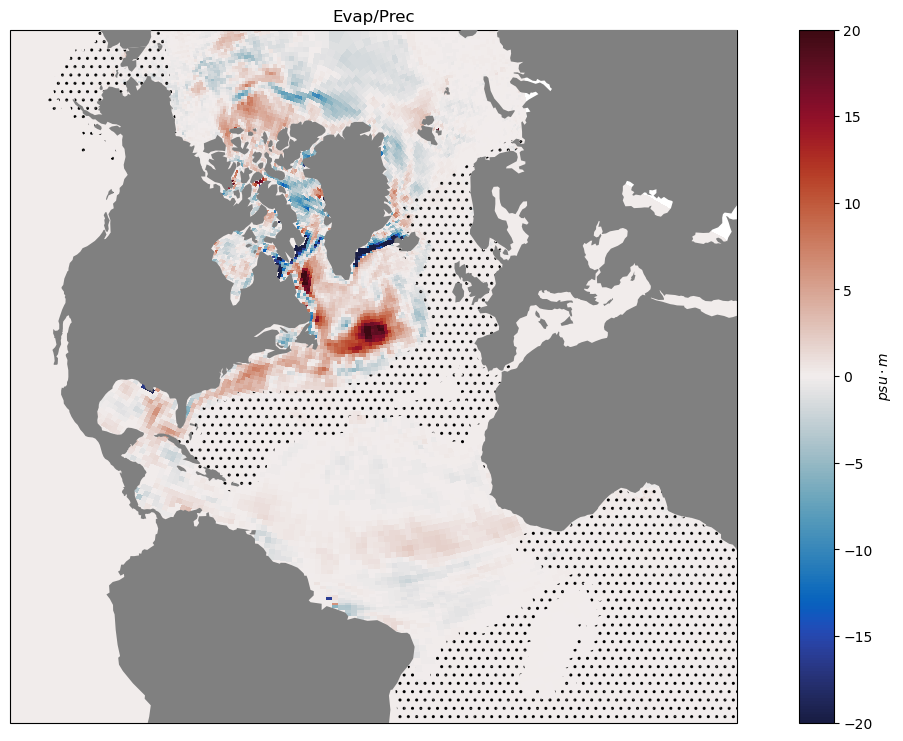

In [33]:
var = 'F'
plot2d(-maps[var].sum(dim = 'Z'),vmax = 20,title = term_dic[var],hash_type = 'surface')

In [15]:
ct = maps['count'][0]/2

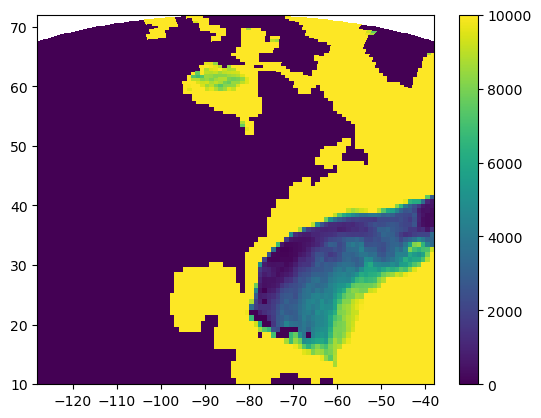

In [16]:
plt.pcolormesh(xg[10],yg[10],ct[10],vmax = 1e4)
plt.colorbar()

In [35]:
condition = ~np.logical_and(True, ct<5e3)
zm = np.ma.masked_where(condition,ct)

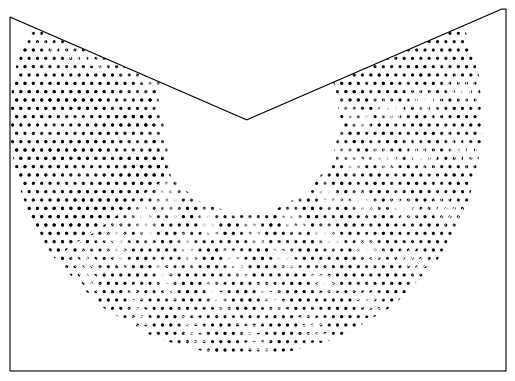

In [36]:
ax = plt.axes(projection = projection)
plt.pcolor(xg[7],yg[7],zm[7],hatch='..',alpha = 0.,transform = ccrs.PlateCarree(),zorder = 5)
# plt.colorbar()